# Final Project Introduction to Machine Learning: Supervised Learning (CSCA5622)

* This project aims to predict house prices based on the Ames Housing Dataset using various supervised learning algorithms. 
* Algorithms like linear regression, ridge regression, lasso regression, elastic net, decision tree, random forest, gradient boosting, SVR and KNN are used.
* A continuous numerical value (house price) is predicted and therefore it is a regression task.

## Project Motivation and Goal

* The motivation of the project is to apply the theory which was learned in this course. 
* The goal of the project is to compare different algorithms against each other and find a good prediction for the task at hand. Furthermore the results shall be discussed.

In [13]:
# 1_EDA_and_Data_Cleaning.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Dataset

* The dataset used is the Ames Housing dataset from Kaggle. Thapa, Sashank. Ames Housing Dataset. Retrieved from [https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset).
* The dataset contains 2930 observations and 79 different features.

### Features

The 15 top correlated features of the dataset are selected and used for further processing.

- **Overall Qual**: Rates the overall material and finish of the house.
- **Gr Liv Area**: Above ground living area square feet.
- **Garage Cars**: Size of garage in car capacity.
- **Garage Area**: Size of garage in square feet.
- **Total Bsmt SF**: Total square feet of basement area.
- **1st Flr SF**: First Floor square feet.
- **Year Built**: Original construction date.
- **Full Bath**: Full bathrooms above ground.
- **Year Remod/Add**: Remodel date.
- **Garage Yr Blt**: Year garage was built.
- **Foundation_PConc**: Type of foundation - Poured Concrete.
- **Mas Vnr Area**: Masonry veneer area in square feet.
- **TotRms AbvGrd**: Total rooms above grade (does not include bathrooms).
- **Fireplaces**: Number of fireplaces.

In [14]:
# Load the dataset
data = pd.read_csv('../data/AmesHousing.csv')
data = pd.get_dummies(data, drop_first=True)

In [15]:
correlation_matrix = data.corr()
top_features = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1:15]
print("Top Features Correlated with SalePrice:\n", top_features)

Top Features Correlated with SalePrice:
 Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Foundation_PConc', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces'],
      dtype='object')


## Data Cleaning

* Only the best correlated 15 features are used for further analysis the others are dropped
* Rows with missing data are dropped
* Using a correlation matrix, highly correlated data is dropped. "Garage Cars", "Garage Yr Blt" are dropped because of correlation with Garage Area. "TotRms AbvGrd" is dropped because of correlation with "Gr Liv Area".
* With a pairplot of the selected features outliers are located and removed.

## Feature Engineering

* "Total Bsmt SF" and "1st Flr SF" are combined into "Total Bsmt 1st Flr SF'" because they are correlated but add both value.

## Discussion

* A correlation matrix after data cleaning and feature engineering shows that the selected features are reasonably correlated.
* A pair plot after outlier removal confirms that outliers are successfully removed.

In [ ]:
# Filter the dataset to keep only the top 15 features and SalePrice
data = data[['SalePrice'] + top_features.to_list()]
data = data.dropna()

In [16]:
# Basic data exploration
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("Missing Values:\n", data.isnull().sum().sort_values(ascending=False).head(20))
print("Dataset Description:\n", data.describe())



Dataset Shape: (2748, 15)
Dataset Columns: Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Foundation_PConc', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces'],
      dtype='object')
Missing Values:
 SalePrice           0
Overall Qual        0
Gr Liv Area         0
Garage Cars         0
Garage Area         0
Total Bsmt SF       0
1st Flr SF          0
Year Built          0
Full Bath           0
Year Remod/Add      0
Garage Yr Blt       0
Foundation_PConc    0
Mas Vnr Area        0
TotRms AbvGrd       0
Fireplaces          0
dtype: int64
Dataset Description:
            SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
count    2748.000000   2748.000000  2748.000000  2748.000000  2748.000000   
mean   184721.886099      6.170306  1513.937045     1.864993   499.196507   
std     79531.065051      1.379856   503.038835     0.65232

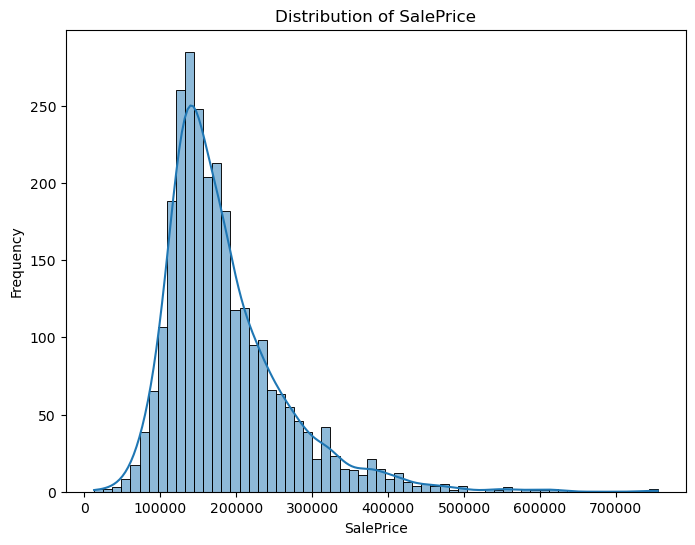

In [17]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


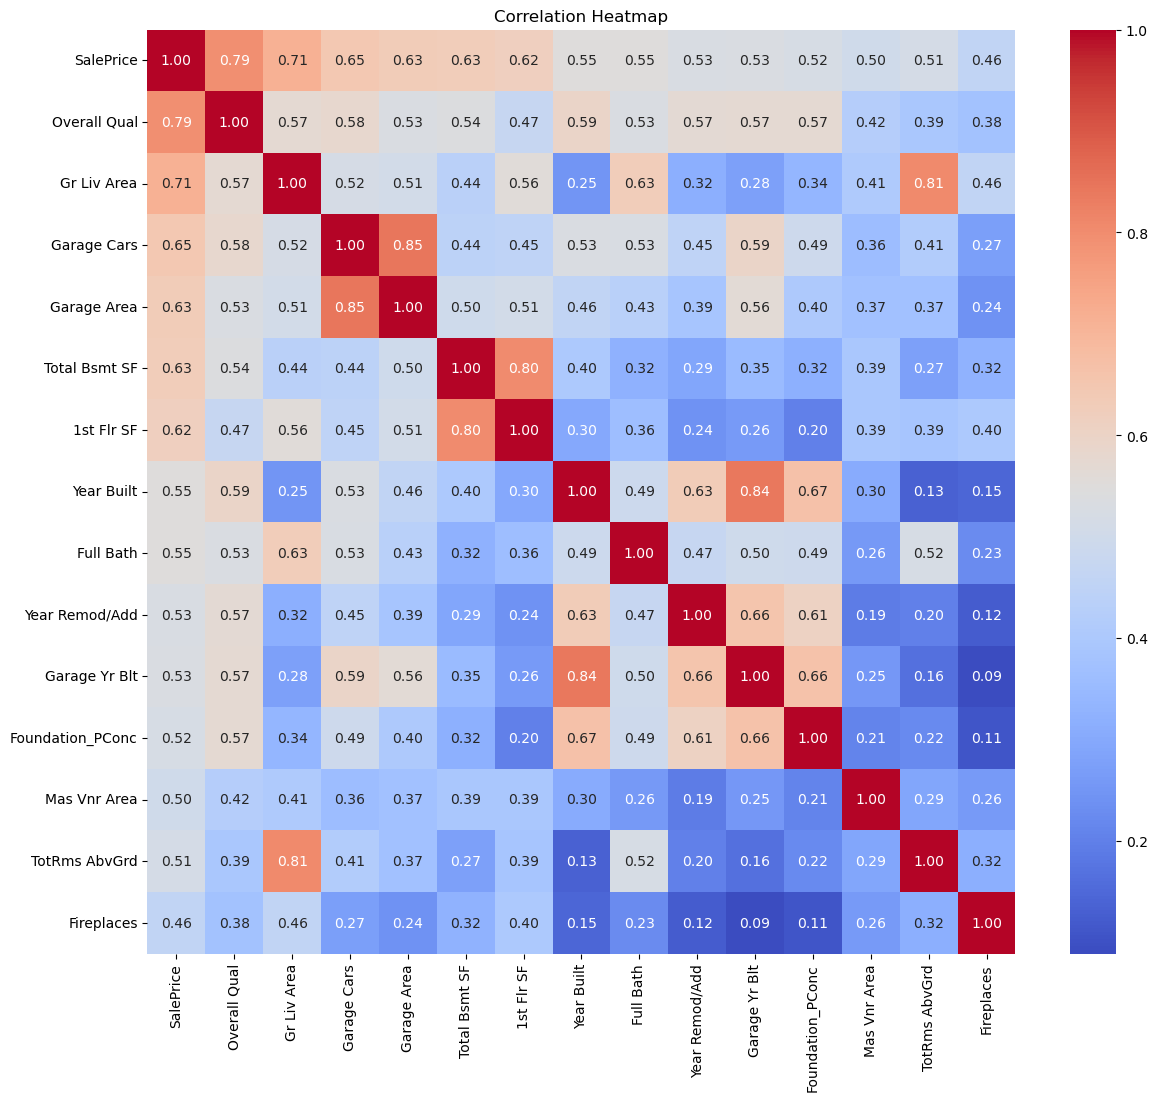

In [18]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
data = data.drop(columns=['Garage Cars'])
data = data.drop(columns=['Garage Yr Blt'])

data['Total Bsmt 1st Flr SF'] = data['Total Bsmt SF'] + data['1st Flr SF']
data = data.drop(columns=['Total Bsmt SF'])
data = data.drop(columns=['1st Flr SF'])

data = data.drop(columns=['TotRms AbvGrd'])

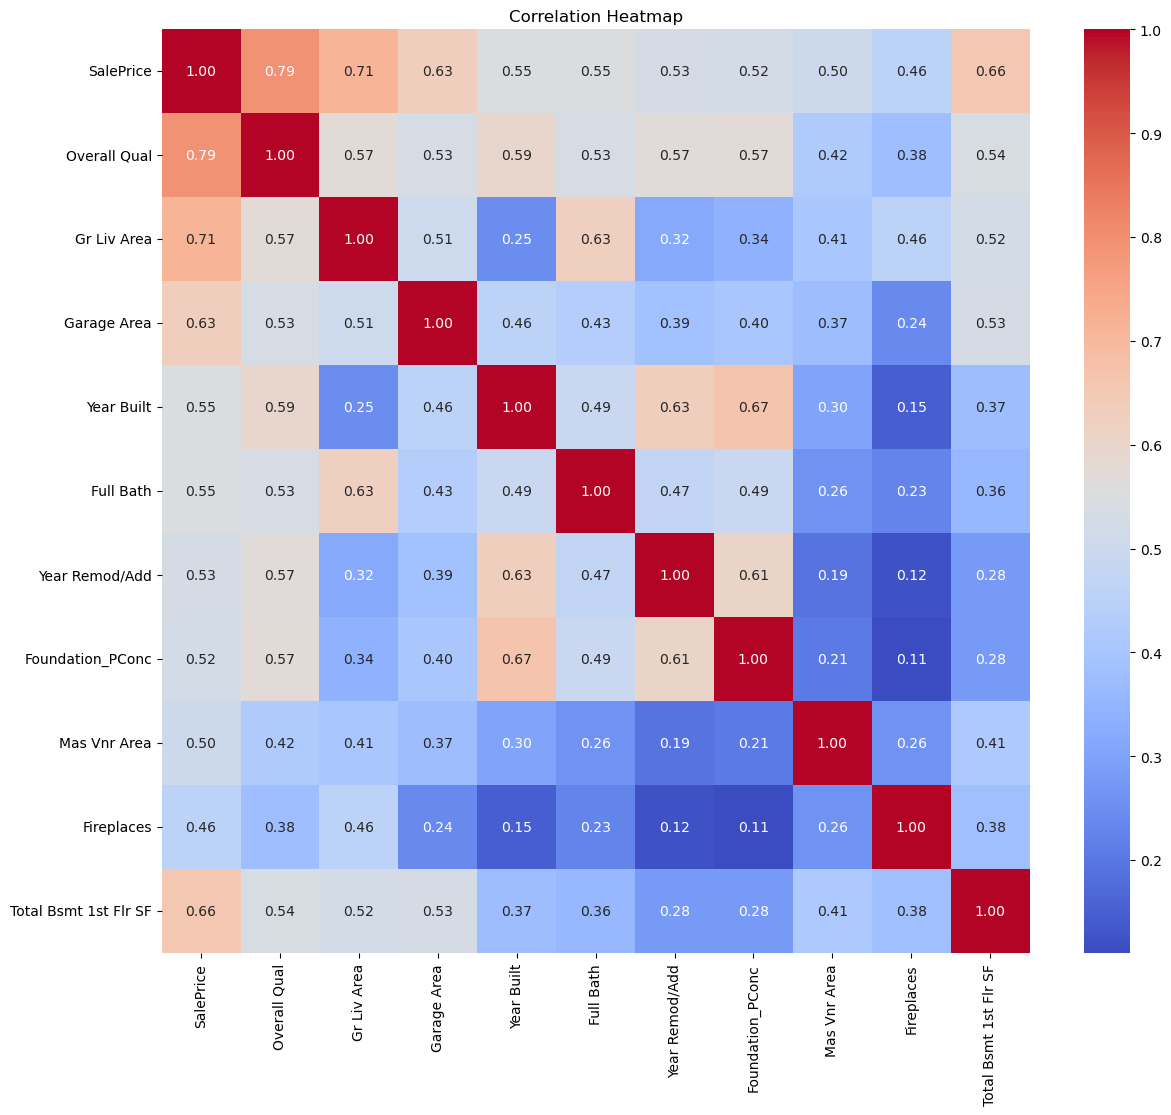

In [20]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

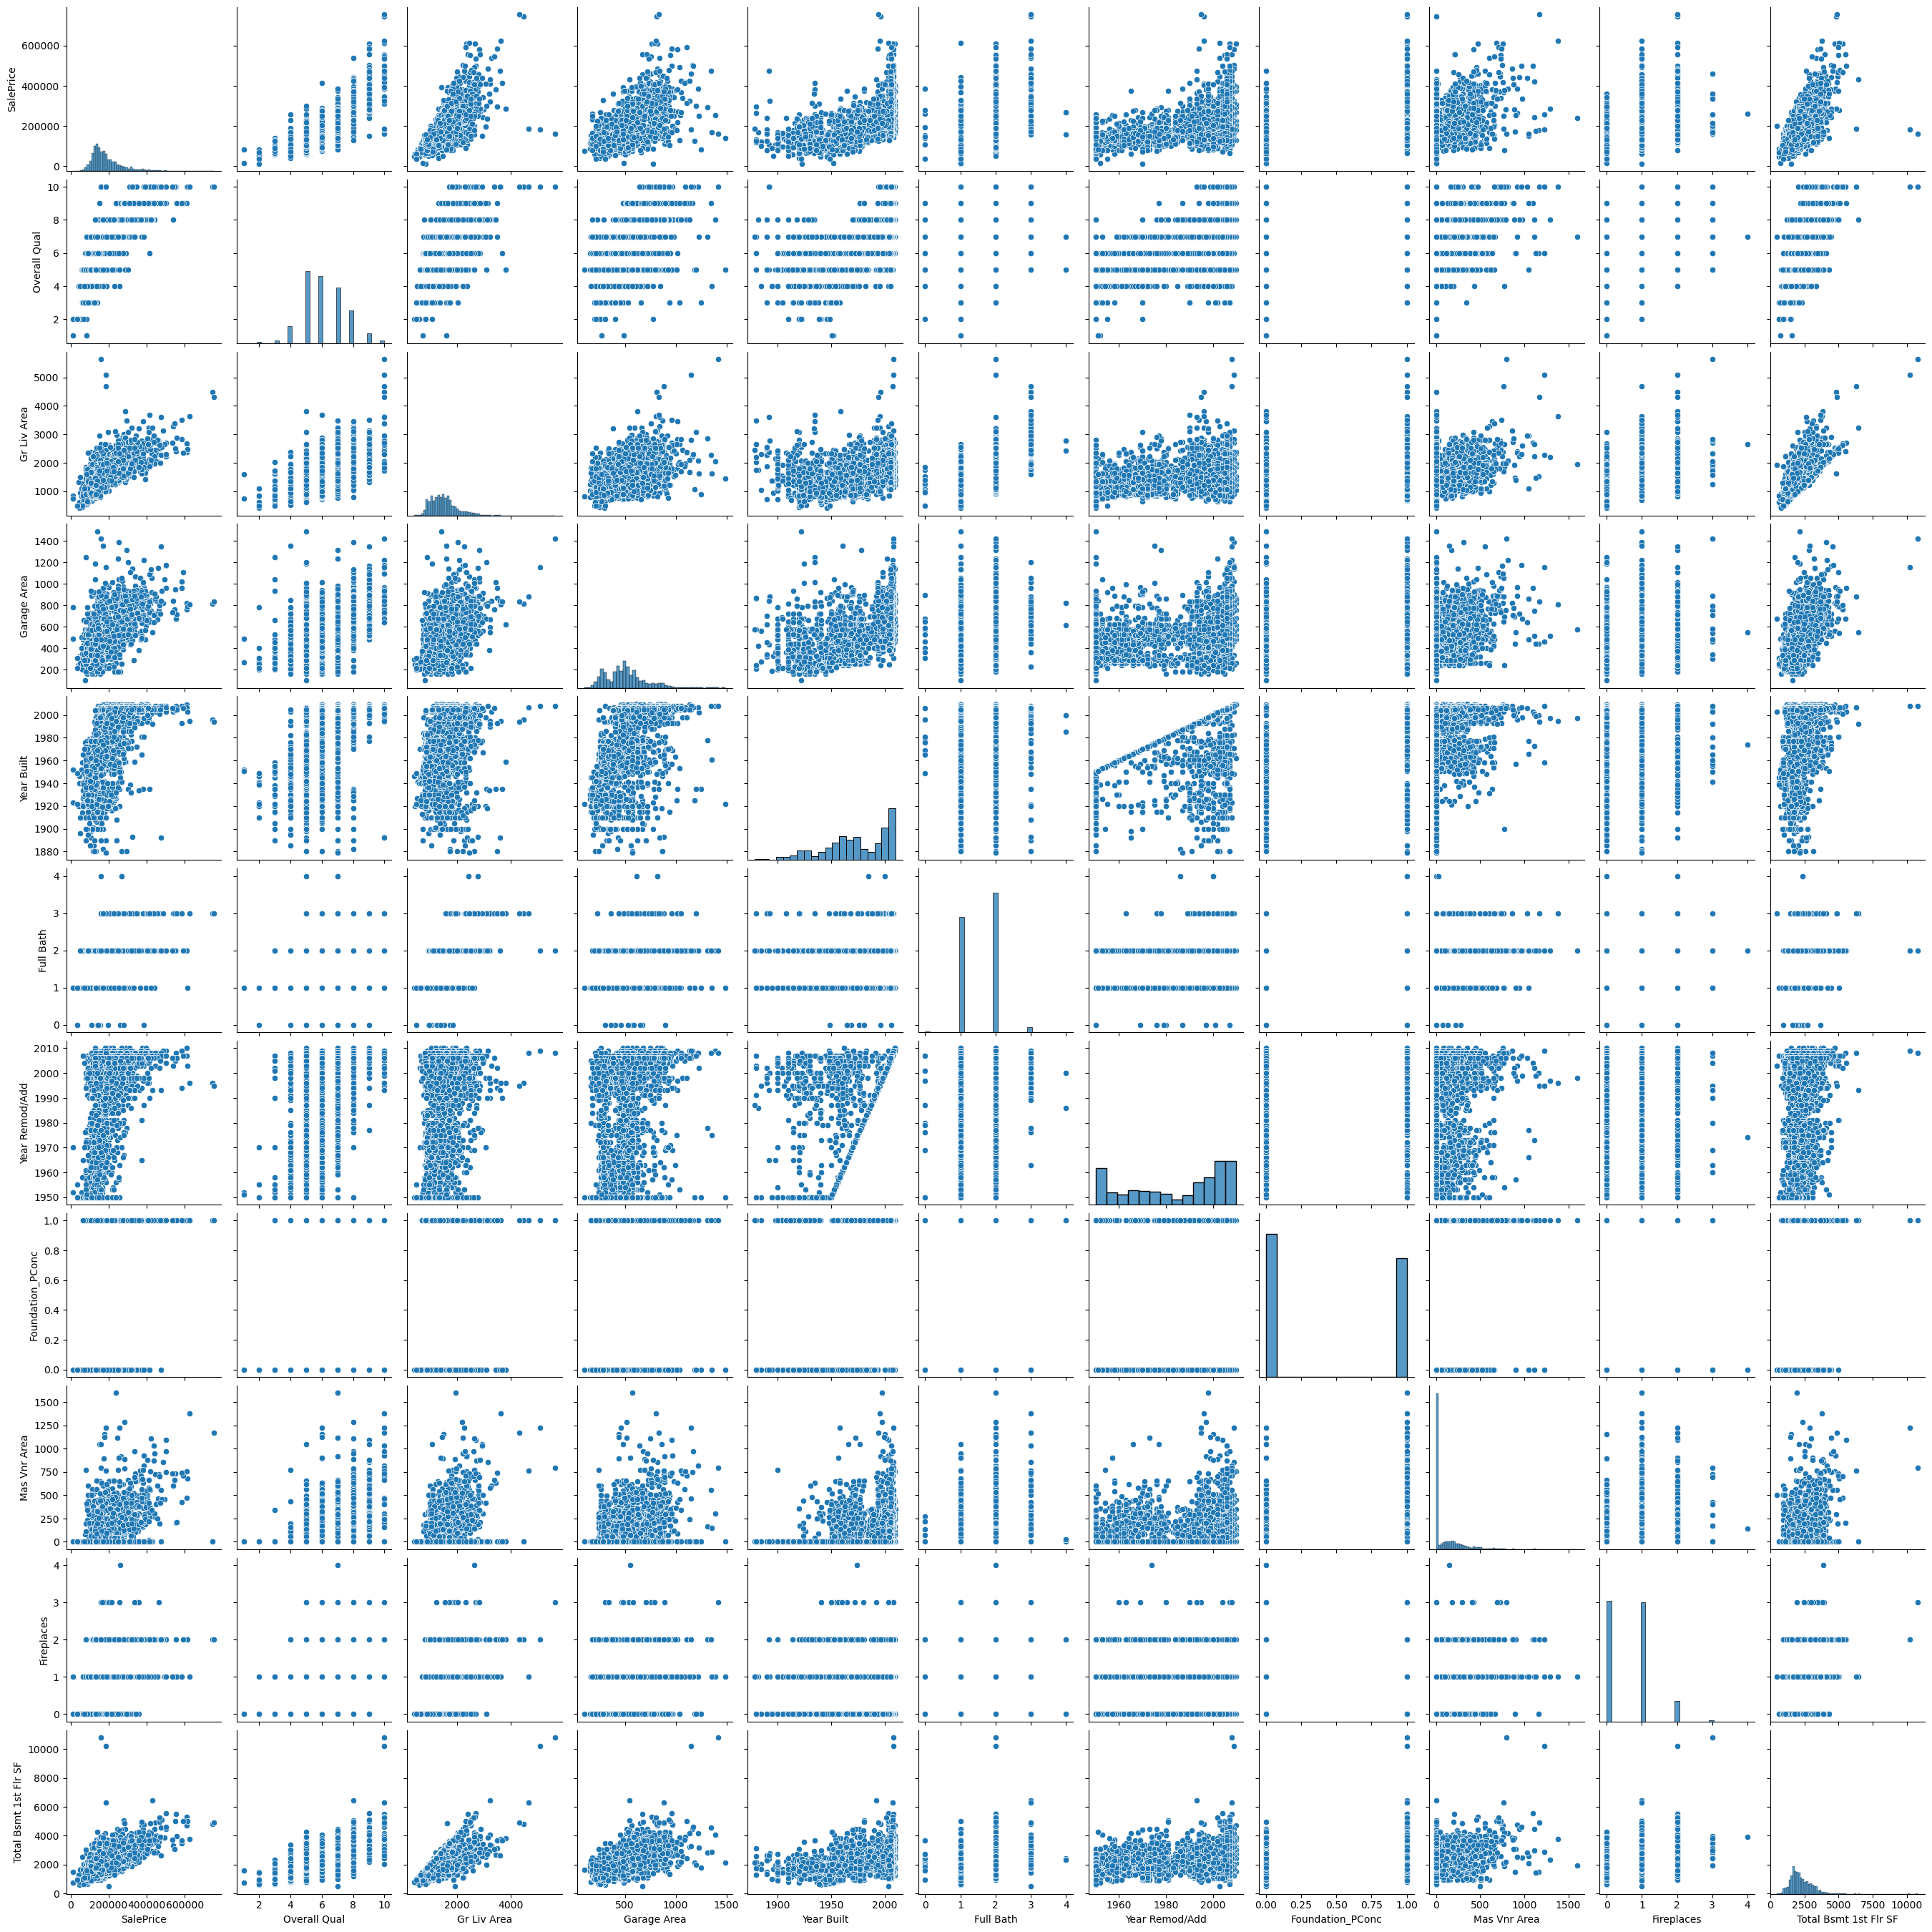

In [21]:
# Pairplot of top correlated features with SalePrice
sns.pairplot(data)
plt.show()

In [22]:
# Remove outliers
data = data[data['Gr Liv Area'] < 4000]

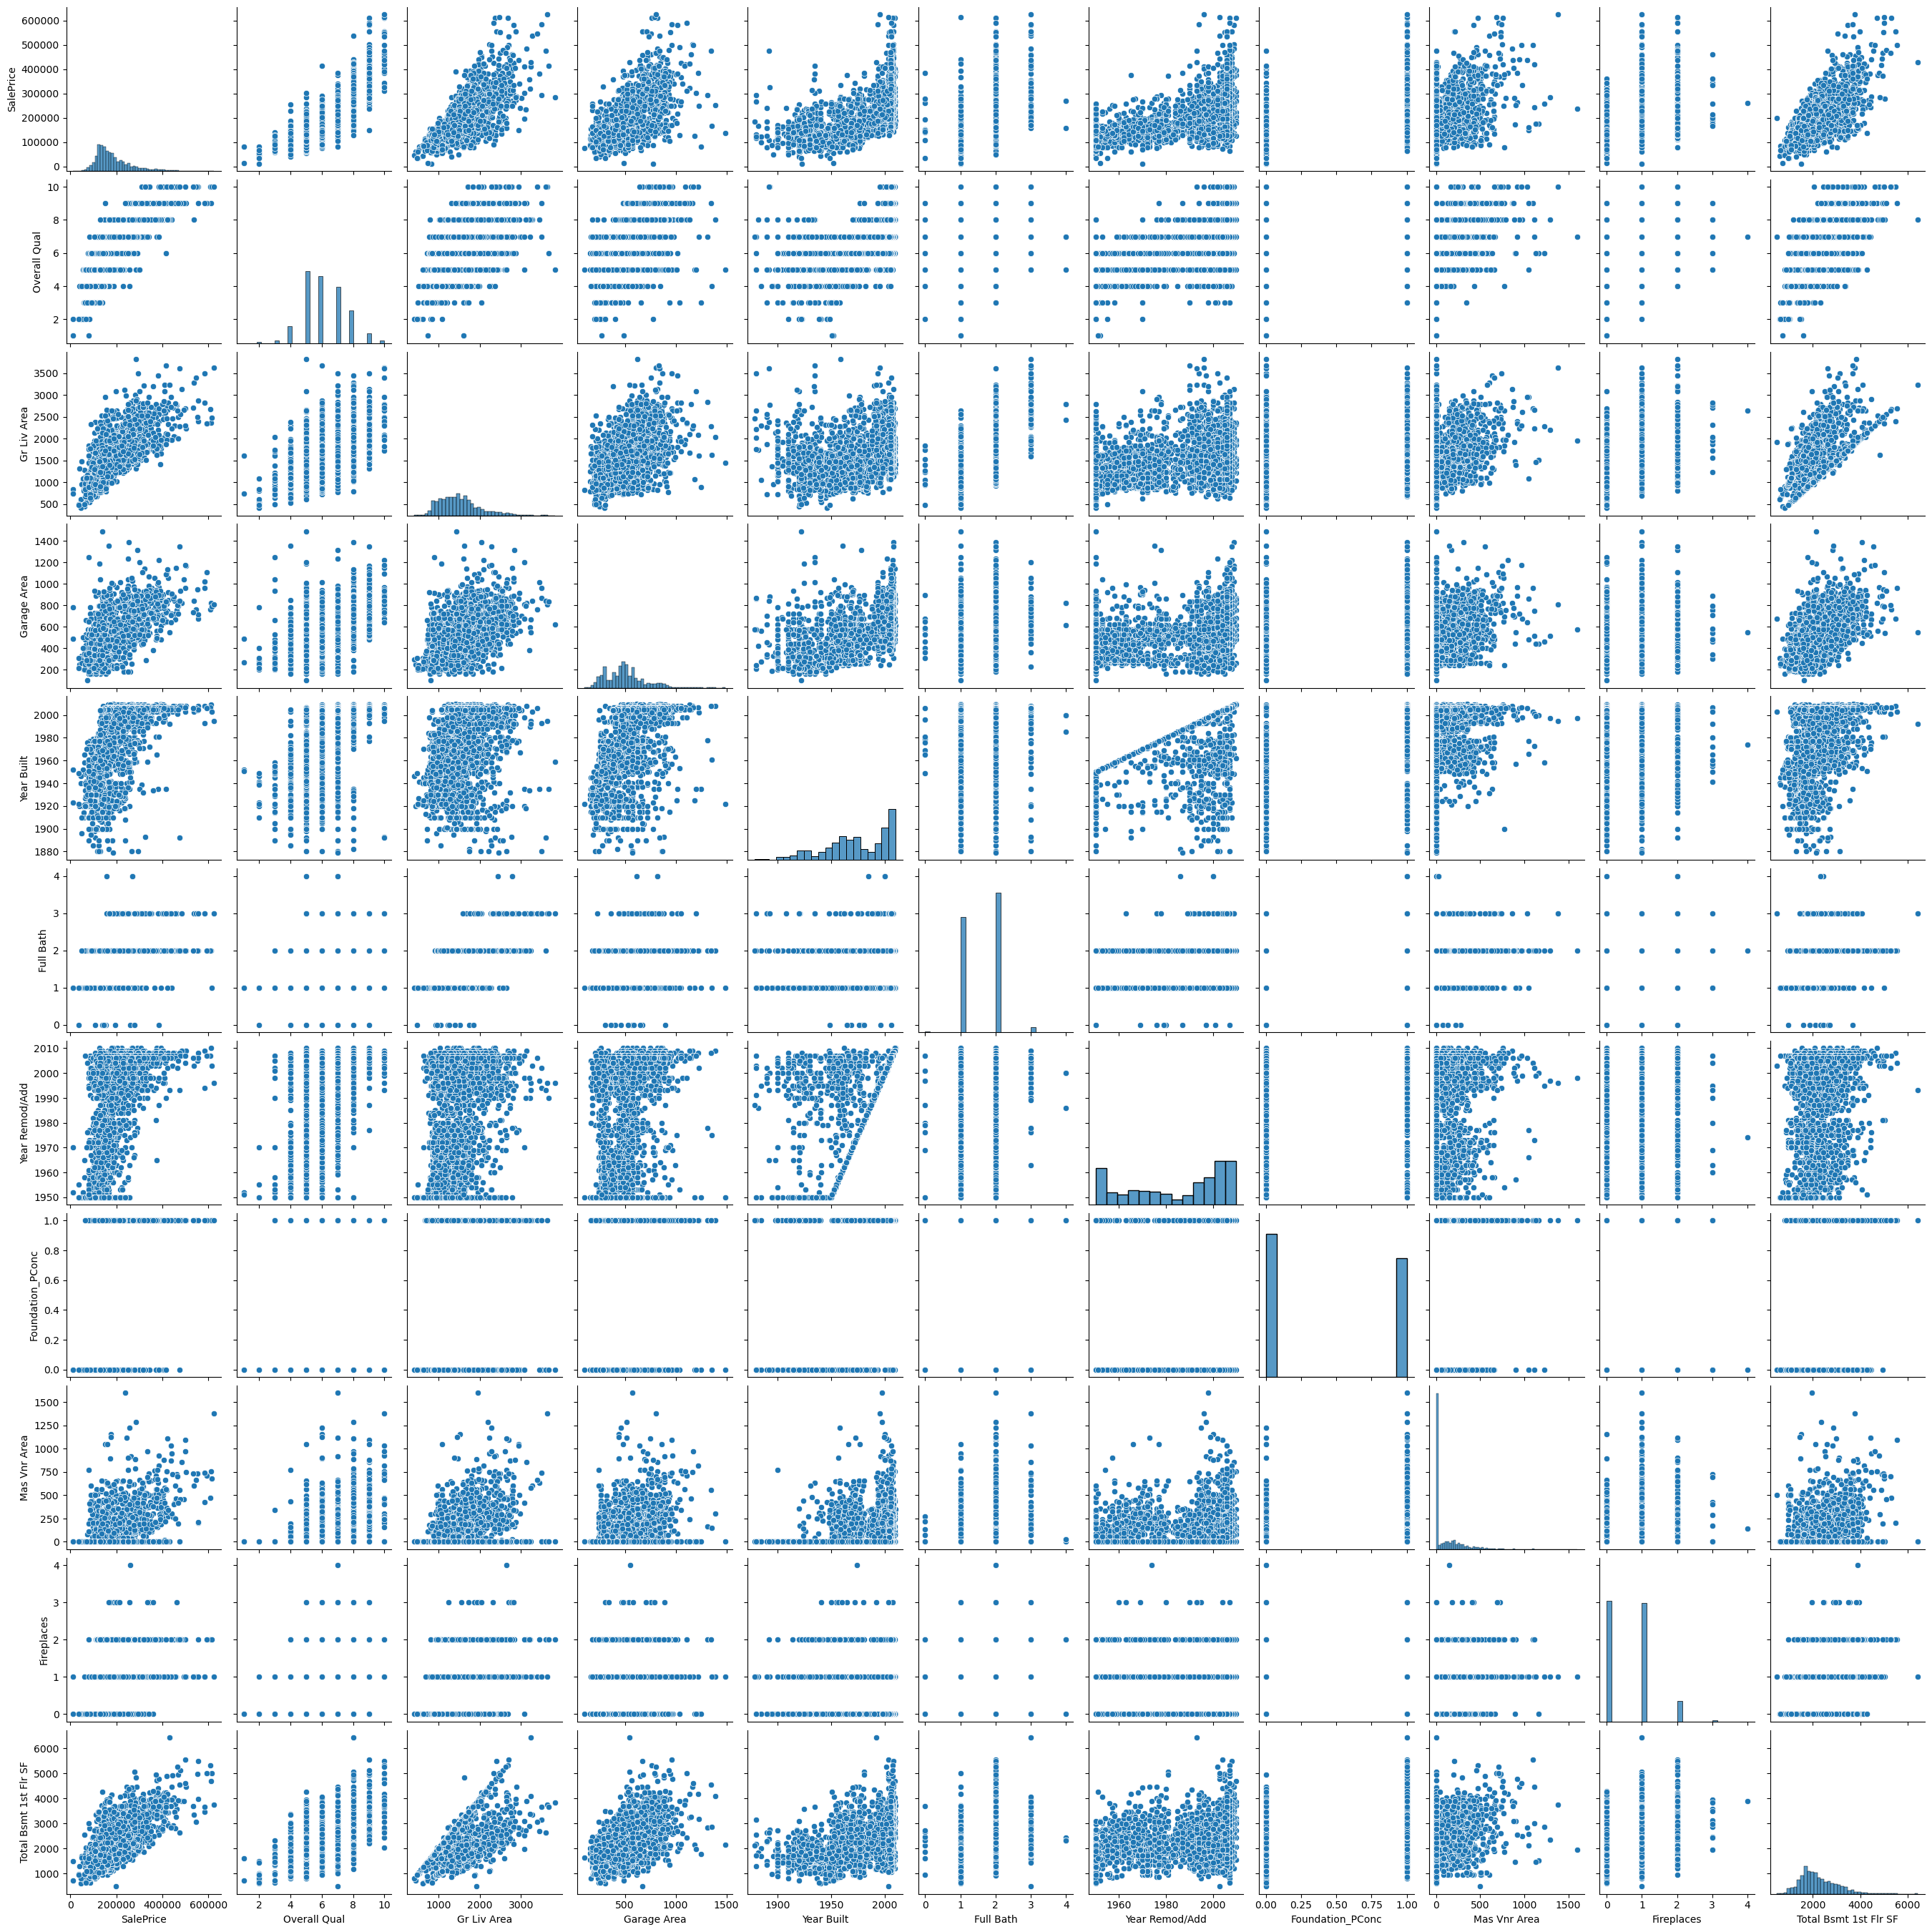

In [23]:
# Pairplot of top correlated features with SalePrice
sns.pairplot(data)
plt.show()

## Data Splitting

In the following cell the data is split into training and test data and both are stored to different files (train.csv, test.csv) and can be used by the model building notebook.

In [25]:
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2)

# Save the resulting datasets to CSV files
train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

print("Data successfully split into train and test sets.")

Data successfully split into train and test sets.


## Discussion on Exploratory Data Analysis

* In the previous section it was shown that the data was successfully analyzed and cleaned.
* The result was also visualized with correlation matrix and pair plot of features before and after data altering.
* The data is ready for the model building which is done in a separate notebook.